In [7]:
import pandas as pd
import requests
import urllib.request
import json
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
def html_to_df(url, clean_empty = False , attrs = {}):
    html_data = requests.get(url).text
    soup = bs(html_data, "lxml")
    table = str(soup.find("table", attrs=attrs))
    df = pd.read_html(str(table))[0]
    
    if clean_empty :
        df = df.loc[:, ~df.isnull().all(axis = 0)]  
    return df


In [13]:
url = "https://github.com/robert456456456456/Web_server_log_parser/blob/master/devops.log"

In [15]:
df = html_to_df(url,clean_empty=True)
df.head

<bound method NDFrame.head of                                                       1
0     64.242.88.10 - - [07/Mar/2004:16:05:49 -0800] ...
1     64.242.88.10 - - [07/Mar/2004:16:06:51 -0800] ...
2     64.242.88.10 - - [07/Mar/2004:16:10:02 -0800] ...
3     64.242.88.10 - - [07/Mar/2004:16:11:58 -0800] ...
4     64.242.88.10 - - [07/Mar/2004:16:20:55 -0800] ...
...                                                 ...
1541  10.0.0.153 - - [12/Mar/2004:12:23:41 -0800] "G...
1542  10.0.0.153 - - [12/Mar/2004:12:23:41 -0800] "G...
1543  216.139.185.45 - - [12/Mar/2004:13:04:01 -0800...
1544  pd95f99f2.dip.t-dialin.net - - [12/Mar/2004:13...
1545  d97082.upc-d.chello.nl - - [12/Mar/2004:13:25:...

[1546 rows x 1 columns]>

In [16]:
df.tail

<bound method NDFrame.tail of                                                       1
0     64.242.88.10 - - [07/Mar/2004:16:05:49 -0800] ...
1     64.242.88.10 - - [07/Mar/2004:16:06:51 -0800] ...
2     64.242.88.10 - - [07/Mar/2004:16:10:02 -0800] ...
3     64.242.88.10 - - [07/Mar/2004:16:11:58 -0800] ...
4     64.242.88.10 - - [07/Mar/2004:16:20:55 -0800] ...
...                                                 ...
1541  10.0.0.153 - - [12/Mar/2004:12:23:41 -0800] "G...
1542  10.0.0.153 - - [12/Mar/2004:12:23:41 -0800] "G...
1543  216.139.185.45 - - [12/Mar/2004:13:04:01 -0800...
1544  pd95f99f2.dip.t-dialin.net - - [12/Mar/2004:13...
1545  d97082.upc-d.chello.nl - - [12/Mar/2004:13:25:...

[1546 rows x 1 columns]>

In [17]:
df = pd.DataFrame(list(df[1].apply(lambda x: x.split())))
df[3] = df[3].apply(lambda x: x.replace('[','') )
df[4] = df[4].apply(lambda x: x.replace(']','') )
df[5] = df.apply(lambda x : ' '.join([x[5],x[6]]).replace('"',''), axis = 1)
df.drop([1,2,7,6],inplace=True,axis = 1)



In [18]:

columns = ['IP Address','Date/Time','GMT Offset', 'Action','Return Code','Size']
df.columns  = columns
df['Date/Time']=pd.to_datetime(df['Date/Time'], format='%d/%b/%Y:%H:%M:%S')

In [19]:
df.head

<bound method NDFrame.head of                       IP Address           Date/Time  ... Return Code   Size
0                   64.242.88.10 2004-03-07 16:05:49  ...         401  12846
1                   64.242.88.10 2004-03-07 16:06:51  ...         200   4523
2                   64.242.88.10 2004-03-07 16:10:02  ...         200   6291
3                   64.242.88.10 2004-03-07 16:11:58  ...         200   7352
4                   64.242.88.10 2004-03-07 16:20:55  ...         200   5253
...                          ...                 ...  ...         ...    ...
1541                  10.0.0.153 2004-03-12 12:23:41  ...         200   1906
1542                  10.0.0.153 2004-03-12 12:23:41  ...         200   1582
1543              216.139.185.45 2004-03-12 13:04:01  ...         200   6051
1544  pd95f99f2.dip.t-dialin.net 2004-03-12 13:18:57  ...         200   2869
1545      d97082.upc-d.chello.nl 2004-03-12 13:25:45  ...         200   7368

[1546 rows x 6 columns]>

In [21]:
type(df)

pandas.core.frame.DataFrame

In [22]:
df['IP Address'].value_counts()

64.242.88.10                         452
10.0.0.153                           270
h24-71-236-129.ca.shawcable.net       51
cr020r01-3.sac.overture.com           44
h24-70-69-74.ca.shawcable.net         32
                                    ... 
206-15-133-181.dialup.ziplink.net      1
lj1061.inktomisearch.com               1
pd95f99f2.dip.t-dialin.net             1
80-219-148-207.dclient.hispeed.ch      1
64.246.94.152                          1
Name: IP Address, Length: 172, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


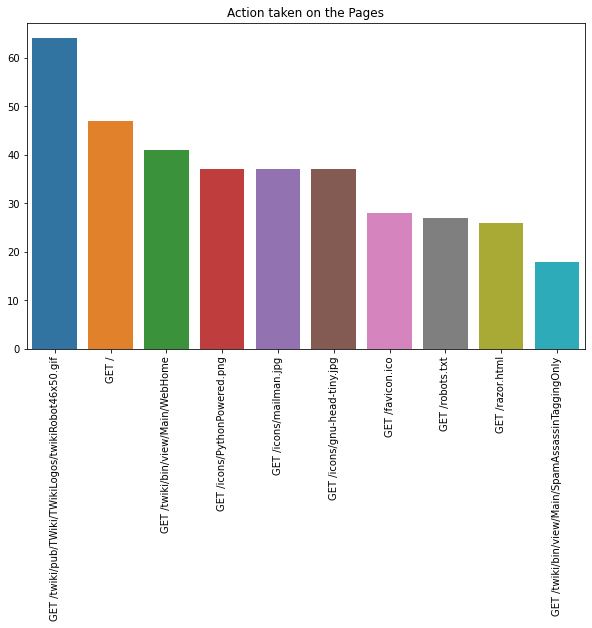

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(df['Action'].value_counts().index[0:10],
            df['Action'].value_counts().values[0:10],)
plt.xticks(rotation=90)
plt.title('Action taken on the Pages')
plt.show()

In [24]:
def ip_loc(x):
    url = "https://geolocation-db.com/jsonp/"+x
    with urllib.request.urlopen(url) as url:
        data = json.loads(url.read().decode().split("(")[1].strip(")"))
    return {"country_code":data["country_code"], 'latitude':data['latitude'],'longitude':data['longitude']}
ip_info = {}
for i in (df['IP Address'].unique()):
    ip_info[i] = ip_loc(i)
df["Country"] = df["IP Address"].apply(lambda x: ip_info[x]["country_code"])
df['latitude'] = df["IP Address"].apply(lambda x: ip_info[x]['latitude'])
df['longitude'] = df["IP Address"].apply(lambda x: ip_info[x]['longitude'])
df['date'] = df['Date/Time'].dt.date
df['time'] = df['Date/Time'].dt.time

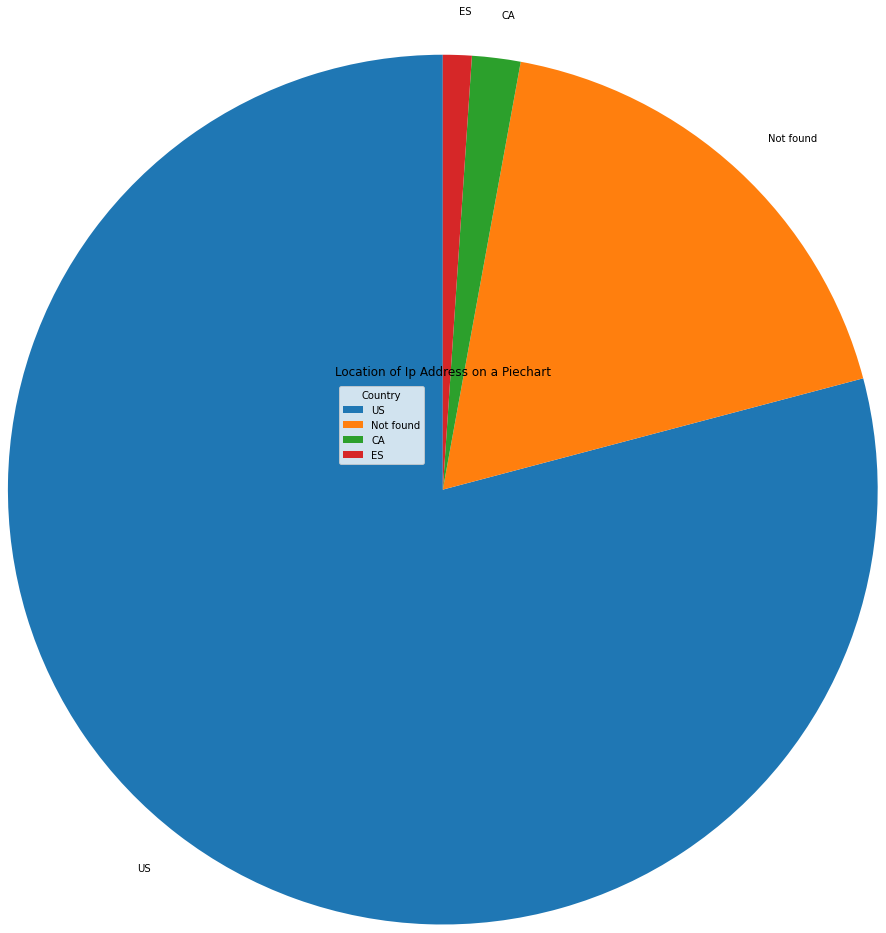

In [30]:
plt.pie(df['Country'].value_counts().values[:4],labels=df['Country'].value_counts().index[:4],startangle=90,radius=5,shadow=False)
plt.legend(title="Country")
plt.title("Location of Ip Address on a Piechart")
plt.show()

In [2]:
#plt.pie(df['Country'].value_counts().values[:],labels=df['Country'].value_counts().index[0:5],startangle=90,radius=4,shadow=False)
#plt.legend(title="Country")

In [ ]:
#plt.pie(df['Country'].value_counts().values[0:5],labels=df['Date/Time'].value_counts().index[0:5],startangle=0,radius=3,shadow=True)